(18520.0, 18767.0)

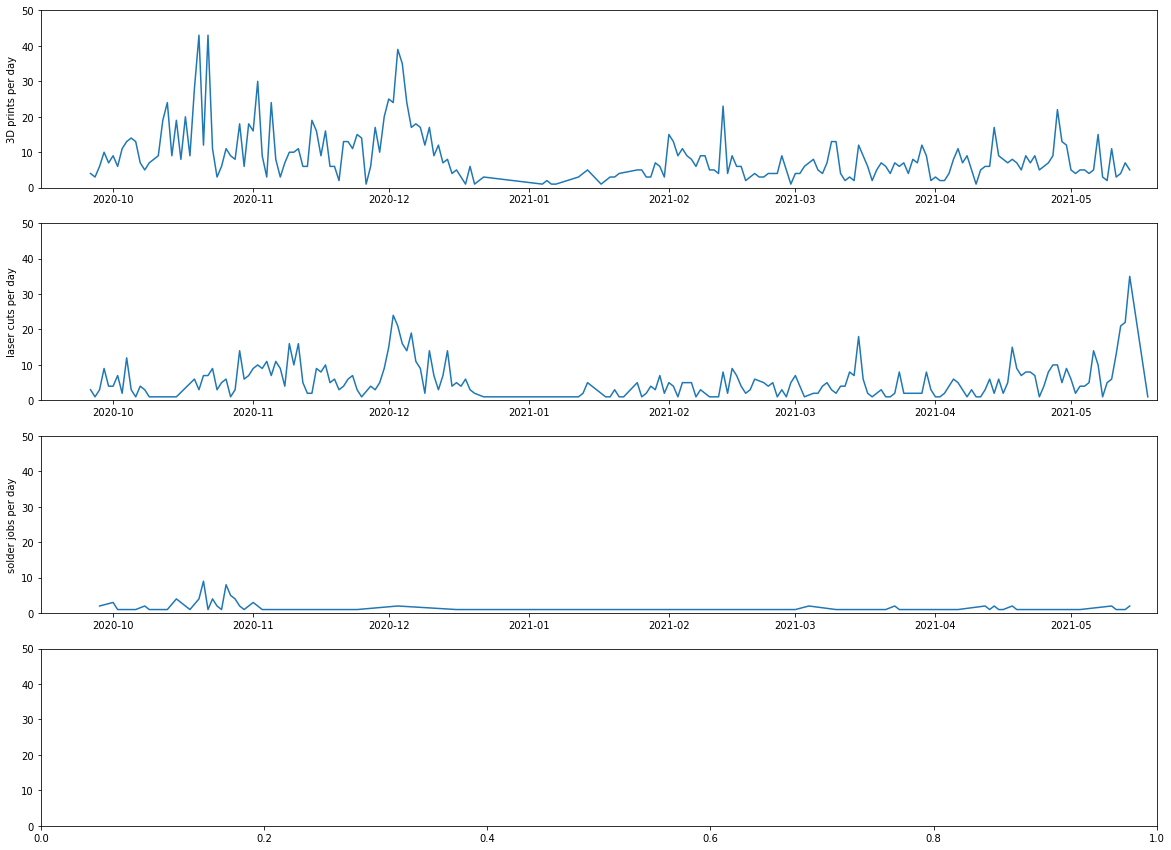

In [40]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import os
import glob

fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

ymax = 50

ax1.set_ylim((0,ymax))
ax2.set_ylim((0,ymax))
ax3.set_ylim((0,ymax))
ax4.set_ylim((0,ymax))

start_date = dt.date(2020, 9, 25)
end_date = dt.date(2021, 5, 20)

def graph_jobs(jobname, ylabel, ax, start_date, end_date):
    file_list = glob.glob(jobname + '/*.json')

    dfs = []
    for file in file_list:
        dfs.append(pd.read_json(file, convert_dates=['ts']))
    jobs = pd.concat(dfs, ignore_index=True, sort=False)
    jobs['date'] = jobs['ts'].dt.date
    
    mask = (jobs['date'] > start_date) & (jobs['date'] <= end_date)
    jobs = jobs.loc[mask]

    axs = jobs['date'].where(jobs['parent_user_id'].isnull()).value_counts().plot(ax=ax)
    axs.set_ylabel(ylabel)

graph_jobs('3dp', '3D prints per day', ax1, start_date, end_date)
graph_jobs('laser', 'laser cuts per day', ax2, start_date, end_date)
graph_jobs('soldering', 'solder jobs per day', ax3, start_date, end_date)

ax1.set_xlim(pd.Timestamp('2020-09-15'), pd.Timestamp('2021-05-20'))
ax2.set_xlim(pd.Timestamp('2020-09-15'), pd.Timestamp('2021-05-20'))
ax3.set_xlim(pd.Timestamp('2020-09-15'), pd.Timestamp('2021-05-20'))

#lasercuts = pd.read_csv('laser-cutter-event-307-log-2021-06-11.csv', sep='\t', parse_dates=['Date and Time'])
#lasercuts['date'] = lasercuts['Date and Time'].dt.date

#lasercuts['date'].value_counts().plot(ax=ax2)

#ax1.set_xlim(pd.Timestamp('2019-08-01'), pd.Timestamp('2021-05-14'))
#ax2.set_xlim(pd.Timestamp('2019-08-01'), pd.Timestamp('2021-05-14'))
#ax3.set_xlim(pd.Timestamp('2019-08-01'), pd.Timestamp('2021-05-14'))